<a href="https://colab.research.google.com/github/torotoro21/Pemrograman_Python/blob/main/Angga_Prihantoro_python_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Angga Prihantoro (1101190146)

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
NtL = lambda x: 10*np.log10(x)

In [57]:
LtN = lambda x: 10**(x/10)

In [58]:
f=1800 #MHz
f2=700 #MHz
f3=900 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
dayatrans=30000 #miliWatt
gtx=10 #db
grx=2 #db
bw=5000000 #Hz
d=np.random.randint(dmin,dmax,N)

PATHLOSS

In [59]:
def cos(frek,tipe,ht,hr,d):
  if frek in range(150,1501):
      Ca=69.55
      Cb=26.16
  elif frek in range(1501,2001):
      Ca=46.3
      Cb=33.9
    
  if tipe=='urban' :
      Cm=0
  elif tipe=='suburban' :
      Cm= -2*((np.log10((frek/28)**2))-5.4)
  elif tipe=='open' :
      Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
  else :
      Cm='tipe salah'
    
  ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
  Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
  return Lp

In [60]:
d_sort=d[np.argsort(d)]

In [61]:
LpUrban=cos(f,loc1,tower,user,d_sort)
LpSuburban=cos(f,loc2,tower,user,d_sort)
LpOpen=cos(f,loc3,tower,user,d_sort)

In [62]:
Lp1=cos(f,loc1,tower,user,d_sort)
Lp2=cos(f2,loc1,tower,user,d_sort)
Lp3=cos(f3,loc1,tower,user,d_sort)

DAYA TERIMA

In [63]:
ptx=NtL(dayatrans)

In [64]:
def pterim(ptx,pl,gtx,grx):
  PRX=ptx-pl+gtx+grx
  prx=LtN(PRX)
  return prx

In [65]:
prx1=pterim(ptx,LpUrban,gtx,grx)
prx2=pterim(ptx,LpSuburban,gtx,grx)
prx3=pterim(ptx,LpOpen,gtx,grx)

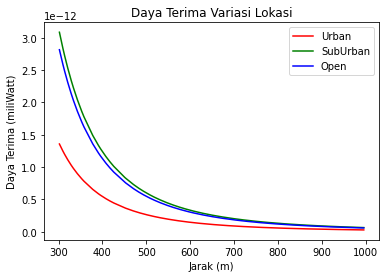

In [66]:
plt.figure()
plt.plot(d_sort,prx1,'r',label='Urban')
plt.plot(d_sort,prx2,'g',label='SubUrban')
plt.plot(d_sort,prx3,'b',label='Open')
plt.legend()
plt.title('Daya Terima Variasi Lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

In [67]:
prx4=pterim(ptx,Lp1,gtx,grx)
prx5=pterim(ptx,Lp2,gtx,grx)
prx6=pterim(ptx,Lp3,gtx,grx)

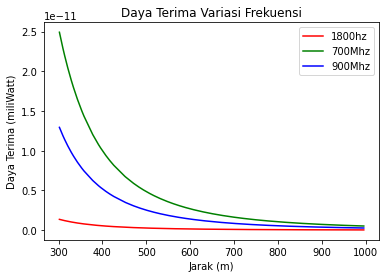

In [68]:
plt.figure()
plt.plot(d_sort,prx4,'r',label='1800hz')
plt.plot(d_sort,prx5,'g',label='700Mhz')
plt.plot(d_sort,prx6,'b',label='900Mhz')
plt.legend()
plt.title('Daya Terima Variasi Frekuensi')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

SNR

In [69]:
def esener(prx,bw):
  no=-174+(10*np.log10(bw))
  no1=LtN(no)
  snr=prx/no1
  return snr

In [70]:
snr1=esener(prx1,bw)
snr2=esener(prx2,bw)
snr3=esener(prx3,bw)

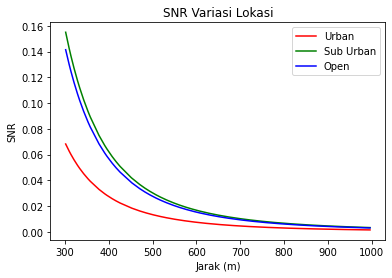

In [71]:
plt.figure()
plt.plot(d_sort,snr1,'r',label='Urban')
plt.plot(d_sort,snr2,'g',label='Sub Urban')
plt.plot(d_sort,snr3,'b',label='Open')
plt.legend()
plt.title('SNR Variasi Lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

In [72]:
snr4=esener(prx4,bw)
snr5=esener(prx5,bw)
snr6=esener(prx6,bw)

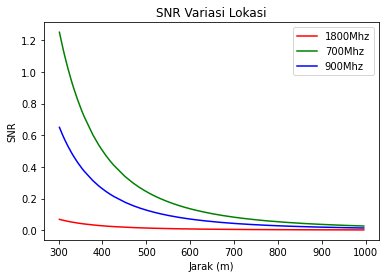

In [73]:
plt.figure()
plt.plot(d_sort,snr4,'r',label='1800Mhz')
plt.plot(d_sort,snr5,'g',label='700Mhz')
plt.plot(d_sort,snr6,'b',label='900Mhz')
plt.legend()
plt.title('SNR Variasi Lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

KAPASITAS

In [74]:
def kapas(snr,bw):
  kapasitas=bw*np.log2(1+snr)
  return kapasitas

In [75]:
kapasitas1=kapas(snr1,bw)
kapasitas2=kapas(snr2,bw)
kapasitas3=kapas(snr3,bw)

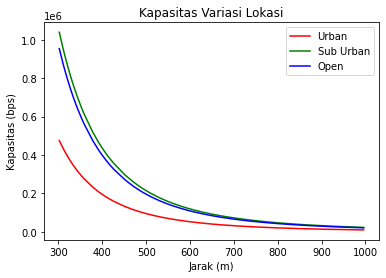

In [76]:
plt.figure()
plt.plot(d_sort,kapasitas1,'r',label='Urban')
plt.plot(d_sort,kapasitas2,'g',label='Sub Urban')
plt.plot(d_sort,kapasitas3,'b',label='Open')
plt.legend()
plt.title('Kapasitas Variasi Lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [77]:
kapasitas4=kapas(snr4,bw)
kapasitas5=kapas(snr5,bw)
kapasitas6=kapas(snr6,bw)

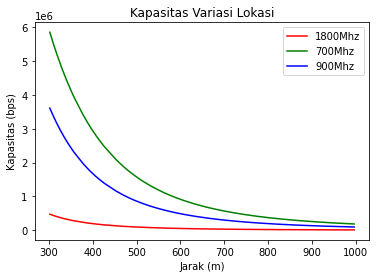

In [78]:
plt.figure()
plt.plot(d_sort,kapasitas4,'r',label='1800Mhz')
plt.plot(d_sort,kapasitas5,'g',label='700Mhz')
plt.plot(d_sort,kapasitas6,'b',label='900Mhz')
plt.legend()
plt.title('Kapasitas Variasi Lokasi')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()